<table>
  <tr>
    <th class="tg-xldj" style="text-align: left; vertical-align: middle;">Variable</th>
    <th class="tg-xldj" style="text-align: left; vertical-align: middle;">Definition</th>
    <th class="tg-xldj" style="text-align: left; vertical-align: middle;">Key</th>
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">survival</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">Survival</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">pclass</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">Ticket class</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">sex</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">Sex</td>	
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;"> </td> 
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">Age</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">Age in years</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;"> </td>
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">sibsp</td>	
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;"># of siblings / spouses aboard the Titanic</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;"></td>
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">parch</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;"># of parents / children aboard the Titanic</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;"></td>
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">ticket</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">Ticket number</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;"></td>
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">embarked</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">Port of Embarkation</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
  <tr>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">fare</td>
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;">Passenger fare</td>	
    <td class="tg-xldj" style="text-align: left; vertical-align: middle;"></td>
  </tr>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turcin, Mr. Stjepan",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [10]:
train[["Survived","Pclass"]].groupby("Pclass").mean().sort_values('Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
train[["Survived","Sex"]].groupby("Sex").mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
a=train[["Survived","SibSp"]].groupby("SibSp").mean().sort_values(by='Survived', ascending=False)

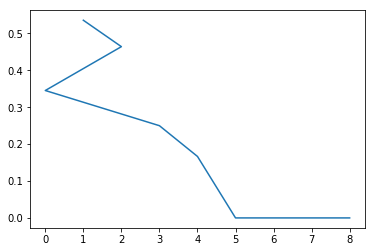

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
plt.plot(a.index,a['Survived'])
plt.show()
a

In [14]:
train['famsize']=train['Parch']+train['SibSp']
test['famsize']=test['Parch']+test['SibSp']
a=train[["Survived","famsize"]].groupby("famsize").mean().sort_values('Survived', ascending=False)
a

,Survived
famsize,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


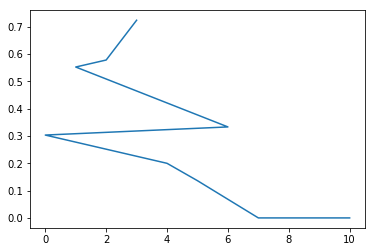

In [15]:
plt.plot(a.index,a['Survived'])
plt.show()

In [16]:
train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'famsize'],
      dtype=object)

In [17]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [18]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'famsize'],
      dtype=object)

In [19]:
train.columns.values,test.columns.values

(array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'famsize'],
       dtype=object),
 array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'famsize'], dtype=object))

In [20]:
a=train.groupby(['Pclass','SibSp']).mean()
a['Age']

Pclass  SibSp
1       0        39.181416
        1        37.414154
        2        37.200000
        3        22.000000
2       0        31.934220
        1        27.363636
        2        19.125000
        3        30.000000
3       0        27.630201
        1        24.912698
        2        18.875000
        3         8.875000
        4         7.055556
        5        10.200000
        8              NaN
Name: Age, dtype: float64

In [21]:
train_grouped=train.groupby(['Pclass','SibSp'])
train_imputed = train_grouped.transform(lambda grp: grp.fillna(grp.median()))
train_imputed[['Pclass','SibSp','Survived','Parch','Fare','famsize','PassengerId','Sex']]=train[['Pclass','SibSp','Survived','Parch','Fare','famsize','PassengerId','Sex']]
train_imputed['Embarked'] = train_grouped['Embarked'].apply(lambda grp: grp.fillna(grp.mode()))
train_imputed.dropna(inplace=True)
train_imputed.columns.values
train_imputed.index=train_imputed['PassengerId']
train_imputed.drop('PassengerId',axis=1,inplace=True)
train_imputed.columns.values

#imputation in test dataset

test_grouped=test.groupby(['Pclass','SibSp'])
test_imputed= test_grouped.transform(lambda grp: grp.fillna(grp.median()))
test_imputed['Embarked'] = test_grouped['Embarked'].apply(lambda grp: grp.fillna(grp.mode()))
test_imputed[['Pclass','Sex','Embarked','famsize','SibSp']]=test[['Pclass','Sex','Embarked','famsize','SibSp']]
test_imputed.index=test_imputed['PassengerId']
test_imputed.drop('PassengerId',axis=1,inplace=True)

c:\users\nxs045000\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [22]:
train_imputed.columns.values, test_imputed.columns.values

(array(['Survived', 'Sex', 'Age', 'Parch', 'Fare', 'famsize', 'Pclass',
        'SibSp', 'Embarked'], dtype=object),
 array(['Sex', 'Age', 'Parch', 'Fare', 'famsize', 'Embarked', 'Pclass',
        'SibSp'], dtype=object))

In [23]:
train_imputed.drop(['Parch','SibSp'],axis=1,inplace= True)
test_imputed.drop(['Parch','SibSp'],axis=1,inplace=True)
train_imputed.columns.values

array(['Survived', 'Sex', 'Age', 'Fare', 'famsize', 'Pclass', 'Embarked'],
      dtype=object)

In [24]:
train_imputed.shape, test_imputed.shape

((882, 7), (418, 6))

In [25]:
test_imputed.columns.values

array(['Sex', 'Age', 'Fare', 'famsize', 'Embarked', 'Pclass'],
      dtype=object)

In [26]:
a=train_imputed['Embarked'].isnull()

In [27]:
len(a)

882

In [28]:
np.unique(test_imputed['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [29]:
#train.drop([62,830],inplace=True)

In [30]:
emb=pd.get_dummies(train_imputed['Embarked'],columns='Embarked',prefix='Embarked')
print(emb)
emb_test=pd.get_dummies(test_imputed['Embarked'],columns='Embarked',prefix='Embarked')

             Embarked_C  Embarked_Q  Embarked_S
PassengerId                                    
1                     0           0           1
2                     1           0           0
3                     0           0           1
4                     0           0           1
5                     0           0           1
6                     0           1           0
7                     0           0           1
8                     0           0           1
9                     0           0           1
10                    1           0           0
11                    0           0           1
12                    0           0           1
13                    0           0           1
14                    0           0           1
15                    0           0           1
16                    0           0           1
17                    0           1           0
18                    0           0           1
19                    0           0     

In [31]:
train_imputed=pd.concat([train_imputed, emb], axis=1)
train_imputed.drop(['Embarked'],axis=1,inplace= True)


In [32]:
test_imputed=pd.concat([test_imputed, emb_test], axis=1)
test_imputed.drop(['Embarked'],axis=1,inplace= True)

In [33]:
test_imputed.head(10)

,Sex,Age,Fare,famsize,Pclass,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,0,34.5,7.8292,0,3,0,1,0
893,1,47.0,7.0000,1,3,0,0,1
894,0,62.0,9.6875,0,2,0,1,0
895,0,27.0,8.6625,0,3,0,0,1
896,1,22.0,12.2875,2,3,0,0,1
897,0,14.0,9.2250,0,3,0,0,1
898,1,30.0,7.6292,0,3,0,1,0
899,0,26.0,29.0000,2,2,0,0,1
900,1,18.0,7.2292,0,3,1,0,0


In [34]:
X=train_imputed.as_matrix(['Pclass','Sex','Age','Fare','Embarked_C','Embarked_S','Embarked_Q','famsize'])
y=train_imputed['Survived']
test_x=test_imputed.as_matrix(['Pclass','Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S','famsize'])


c:\users\nxs045000\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\nxs045000\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_array = []
test_array = []
x_axis = range(1,20)

for k in range(1,20):
    knn=KNeighborsClassifier(k)   
    knn.fit(X_train,y_train)
    train_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    train_array.append(train_score)
    test_array.append(test_score)

line1, = plt.plot(x_axis, train_array, c='g', label = 'Train')
line2, = plt.plot(x_axis, test_array, c='b', label = 'Test')
plt.axis([1,20,0.7,1])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(handles = [line1, line2],loc = 1)
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbor = 7)   
knn.fit(X_train,y_train)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)

print('Train score=',train_score,'Test score=',test_score)
    